In [7]:
import pandas as pd
Givatayim_df = pd.read_pickle("./Givatayim_df.pkl")
Givatayim_df.head()
Givatayim_df.shape

(5644, 20)

## PCA on the meteorological elements to understand the temp
file:///C:/Users/Shelly/Downloads/sustainability-11-06740-v2.pdf

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['temp','temp_min','temp_max','pressure','humidity','wind_speed', 'wind_deg','hour','Day','Night']

# Separating out the features
x = Givatayim_df.loc[:, features].values

# Separating out the target
y = Givatayim_df.loc[:,['dt']].values

# Standardizing the features
z = StandardScaler().fit_transform(x)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(z)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
principalDf.head()

,principal component 1,principal component 2
0,0.446854,-2.154629
1,0.811619,-2.218561
2,0.058218,-2.064339
3,0.058218,-2.064339
4,0.059549,-2.064808


In [11]:
finalDf = pd.concat([principalDf, Givatayim_df[['day_night']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,day_night
0,0.446854,-2.154629,Night
1,0.811619,-2.218561,Night
2,0.058218,-2.064339,Night
3,0.058218,-2.064339,Night
4,0.059549,-2.064808,Night


In [12]:
# we went from 4 features down to 2 features.
# how much information have we lost?
# how much information is captured by each principal component?
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.47958278 0.18850985]
0.6680926338881753


In [13]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Day', 'Night']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [14]:
finalDf = pd.concat([principalDf, Givatayim_df[['Date']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Date
0,0.446854,-2.154629,2020-10-08
1,0.811619,-2.218561,2020-10-08
2,0.058218,-2.064339,2020-10-08
3,0.058218,-2.064339,2020-10-08
4,0.059549,-2.064808,2020-10-08


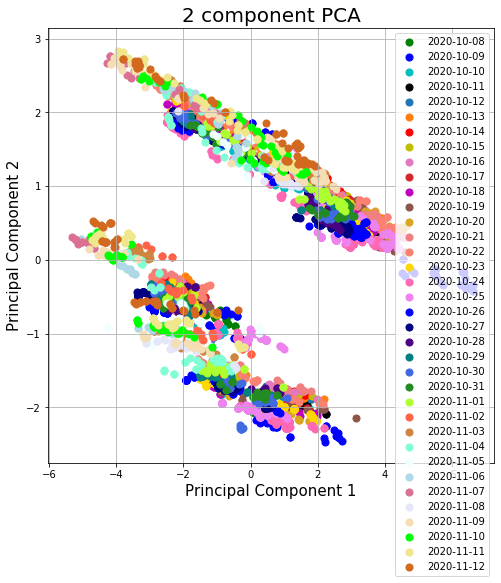

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['2020-10-08','2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16','2020-10-17','2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22','2020-10-23','2020-10-24','2020-10-25','2020-10-26','2020-10-27','2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06','2020-11-07','2020-11-08','2020-11-09','2020-11-10','2020-11-11','2020-11-12','2020-11-13','2020-11-14','2020-11-15']
colors = ['g','b','c','k','tab:blue','tab:orange','r','y','tab:pink','tab:red','m','tab:brown','goldenrod','lightcoral','salmon','gold','hotpink','violet','blue','navy','indigo','teal','royalblue','forestgreen','greenyellow','tomato','peru','aquamarine','azure','lightblue','palevioletred','lavender','wheat','lime','khaki','chocolate']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Date'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [16]:
finalDf = pd.concat([principalDf, Givatayim_df[['hour']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,hour
0,0.446854,-2.154629,22
1,0.811619,-2.218561,22
2,0.058218,-2.064339,23
3,0.058218,-2.064339,23
4,0.059549,-2.064808,23


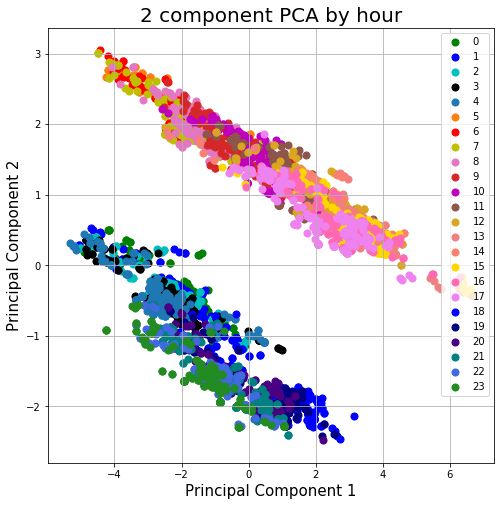

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA by hour', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
# warm colors represent day time, cold colors represent night time
colors = ['g','b','c','k','tab:blue','tab:orange','r','y','tab:pink','tab:red','m','tab:brown','goldenrod','lightcoral','salmon','gold','hotpink','violet','blue','navy','indigo','teal','royalblue','forestgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['hour'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [18]:
finalDf = pd.concat([principalDf, Givatayim_df[['Month']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Month
0,0.446854,-2.154629,10
1,0.811619,-2.218561,10
2,0.058218,-2.064339,10
3,0.058218,-2.064339,10
4,0.059549,-2.064808,10


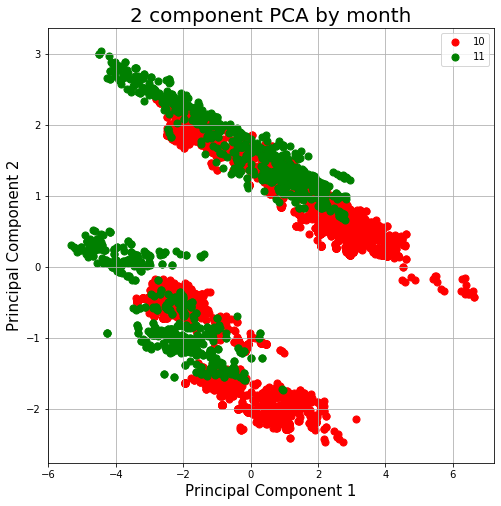

In [19]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA by month', fontsize = 20)

targets = [10,11]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [20]:
from sklearn.preprocessing import StandardScaler

features = ['temp_min','temp_max','pressure','humidity','wind_speed', 'wind_deg','hour','Day','Night']

# Separating out the features
x = Givatayim_df.loc[:, features].values

# Separating out the target
y = Givatayim_df.loc[:,['temp']].values

# Standardizing the features
z = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(z)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [22]:
finalDf = pd.concat([principalDf, Givatayim_df[['temp']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,temp
0,-0.108405,-1.926926,27.14
1,0.383200,-2.131383,26.78
2,-0.296919,-1.917600,25.71
3,-0.296919,-1.917600,25.71
4,-0.296919,-1.917600,25.72


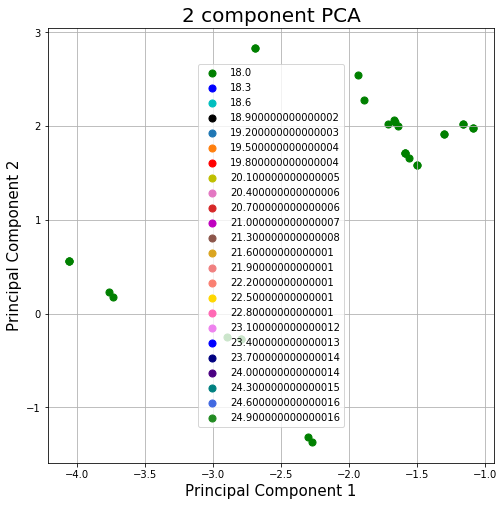

In [23]:
from matplotlib import pyplot as plt
import numpy as np 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(np.arange(18,40,0.3))
colors = ['g','b','c','k','tab:blue','tab:orange','r','y','tab:pink','tab:red','m','tab:brown','goldenrod','lightcoral','salmon','gold','hotpink','violet','blue','navy','indigo','teal','royalblue','forestgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['temp'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## split the data to train and test

In [24]:
# according to class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import warnings
import math
import random
from sklearn.decomposition import PCA

X = Givatayim_df[['temp_min','temp_max','humidity','pressure','wind_speed','wind_deg']].values
Y = Givatayim_df['temp'].values
n = X.shape[0]
tr_size = math.floor(0.8*n)
te_size = n-tr_size
tr_ind = random.sample(range(n),tr_size)
Xtr = X[tr_ind,]
Xte = np.delete(X,tr_ind,0)
Ytr = Y[tr_ind]
Yte = np.delete(Y,tr_ind)

print(n,Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

5644 (4515, 6) (1129, 6) (4515,) (1129,)


In [25]:
# acoording to: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
# after dividing to train and test i can do oversampling of the imbalanced data (dates with less samples per hour)
# i shouldn't delete (downsampling) because i dont have enough data anyway

from sklearn.utils import resample

# Separate input features and target
y = Givatayim_df.temp
X = Givatayim_df.drop('temp', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
majority = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()
    1    213245
    0    213245

IndentationError: unexpected indent (<ipython-input-25-f6325d96519c>, line 32)